# Capstone project 
### Investment and trading project - Predicting stock prices and returns based on machine learning

## 1. Data exploration: get data from quandle api. We primarily choose indices across the world. 

In [ ]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

local_python_path = '/Library/Python/2.7/site-packages'
sys.path.append(local_python_path)

In [324]:
df = pd.read_excel("./futures_data.xlsx", sheetname="ret",skiprows=1)

dates = df['dates']
gprice = df['GOLD']
esprice = df['ES1']
us1price = df['US1']
usdprice = df['USDCAD']
cl1price = df['CL1']
spxprice = df['SPX']
yahooprice = df['YHOO']

gold = df['GOLD.RET'][1:]
es = df['ES1.RET'][1:]
us = df['US1.RET'][1:]
usdcad = df['USDCAD.RET'][1:]
cl1 = df['CL1.RET'][1:]
spx = df['SPX.RET'][1:]
yhoo = df['YHOO.RET'][1:]
df

,dates,GOLD,GOLD.RET,ES1,ES1.RET,US1,US1.RET,USDCAD,USDCAD.RET,CL1,CL1.RET,SPX,SPX.RET,YHOO,YHOO.RET
0,2001-02-28,267.8,NaN,1242.00,NaN,105.59375,NaN,1.5364,NaN,27.39,NaN,1239.94,NaN,11.9063,NaN
1,2001-03-30,257.9,-0.037669,1169.25,-0.060360,104.18750,-0.013407,1.5757,0.025258,26.29,-0.040989,1160.33,-0.066359,7.8750,-0.413374
2,2001-04-30,264.4,0.024891,1254.25,0.070175,100.46875,-0.036345,1.5350,-0.026169,28.46,0.079311,1249.46,0.074007,10.0900,0.247852
3,2001-05-31,265.3,0.003398,1257.50,0.002588,100.18750,-0.002803,1.5380,0.001952,28.37,-0.003167,1255.82,0.005077,9.0550,-0.108228
4,2001-06-29,271.3,0.022364,1231.70,-0.020730,100.31250,0.001247,1.5143,-0.015530,26.25,-0.077666,1224.42,-0.025321,9.9950,0.098768
5,2001-07-31,266.2,-0.018977,1215.25,-0.013446,104.03125,0.036401,1.5335,0.012599,26.35,0.003802,1211.23,-0.010831,8.8100,-0.126198
6,2001-08-31,275.1,0.032887,1135.00,-0.068317,106.03125,0.019043,1.5512,0.011476,27.20,0.031749,1133.58,-0.066256,5.9300,-0.395863
7,2001-09-28,292.4,0.060988,1043.75,-0.083813,105.50000,-0.005023,1.5792,0.017890,23.43,-0.149200,1040.94,-0.085257,4.4050,-0.297284
8,2001-10-31,280.5,-0.041549,1060.75,0.016156,110.43750,0.045739,1.5884,0.005809,21.18,-0.100960,1059.78,0.017937,5.4400,0.211039
9,2001-11-30,273.9,-0.023811,1140.00,0.072052,104.78125,-0.052575,1.5730,-0.009743,19.44,-0.085725,1139.45,0.072484,7.7850,0.358420


In [308]:

def running_view(arr, window, axis=-1):
    """
    return a running view of length 'window' over 'axis'
    the returned array has an extra last dimension, which spans the window
    """
    shape = list(arr.shape)
    shape[axis] -= (window-1)
    assert(shape[axis]>0)
    return np.lib.index_tricks.as_strided(
        arr,
        shape + [window],
        arr.strides + (arr.strides[axis],))


In [316]:
goldMatrix = running_view(gold, 12)
#print gold
df_X = pd.DataFrame(goldMatrix)
#goldMatrix
features = df_X[0:-1]
Y = df_X[11][1:]
print Y

1      0.018343
2      0.021577
3      0.054442
4     -0.039355
5     -0.034682
6      0.031171
7      0.034871
8     -0.017126
9     -0.005038
10     0.094506
11     0.056121
12    -0.050108
13    -0.041976
14     0.010366
15     0.071347
16    -0.051221
17     0.021991
18     0.059760
19     0.025225
20    -0.002078
21     0.031229
22     0.047493
23    -0.033976
24    -0.013517
25     0.074054
26    -0.097770
27     0.016635
28    -0.002541
29    -0.005102
30     0.049642
         ...   
144    0.063651
145   -0.029330
146    0.009693
147   -0.039588
148    0.059528
149   -0.031271
150    0.004050
151   -0.060892
152   -0.032663
153    0.003068
154    0.007545
155    0.076705
156   -0.052508
157   -0.025041
158   -0.000592
159    0.005903
160   -0.014908
161   -0.067878
162    0.033323
163   -0.014683
164    0.022953
165   -0.068530
166   -0.005268
167    0.051652
168    0.100476
169   -0.000162
170    0.044607
171   -0.060450
172    0.083507
173    0.021277
Name: 11, dtype: float64

In [310]:
df_X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.037669,0.024891,0.003398,0.022364,-0.018977,0.032887,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807
1,0.024891,0.003398,0.022364,-0.018977,0.032887,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343
2,0.003398,0.022364,-0.018977,0.032887,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577
3,0.022364,-0.018977,0.032887,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442
4,-0.018977,0.032887,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442,-0.039355
5,0.032887,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442,-0.039355,-0.034682
6,0.060988,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442,-0.039355,-0.034682,0.031171
7,-0.041549,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442,-0.039355,-0.034682,0.031171,0.034871
8,-0.023811,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442,-0.039355,-0.034682,0.031171,0.034871,-0.017126
9,0.018449,0.011050,0.051807,0.018343,0.021577,0.054442,-0.039355,-0.034682,0.031171,0.034871,-0.017126,-0.005038


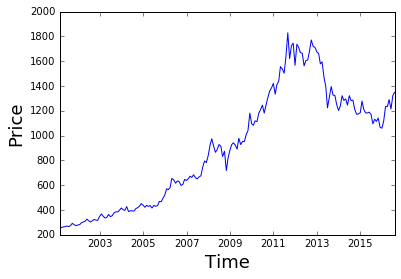

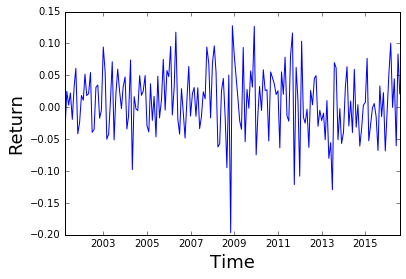

In [410]:
def getSingleNameStockPrice(symbol, start, end):
    """
    Adjusted close price from quandle.
    """
    import quandl
    mydata = quandl.get(symbol, start_date=start, end_date=end, authtoken="zYuLi6xBbvDYgsQJApiA")
    return mydata["Adjusted Close"]

def getReturns(price):
    """
    Get stock returns
    """
    return price.pct_change()[1:]

def getEsFuturesStockPrice(symbol, start, end):
    """
    Adjusted close price from quandle.
    """
    import quandl
    mydata = quandl.get(symbol, start_date=start, end_date=end, authtoken="zYuLi6xBbvDYgsQJApiA")
    return mydata["Close"]

yahoo_close = gprice
returns = gold
#yahoo_close = getStockPrice("SCF/CME_ES1_FW"", "2001-12-31", "2016-03-01")
#yahoo_close = quandl.get("SCF/CME_ES1_FW", start_date="2001-12-31", end_date="2016-03-01", authtoken="zYuLi6xBbvDYgsQJApiA")
#yahoo_close = getEsFuturesStockPrice("GOOG/AMEX_SHY", "2001-12-31", "2016-03-01")

#returns = getReturns(yahoo_close)
#returns
plt.figure(1)
plt.plot(dates, yahoo_close, label='Price')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)

plt.figure(2)
plt.plot(dates[1:], returns, label='Return')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Return',fontsize=18)

In [245]:
yahoo_close

Date
2002-07-26    81.31
2002-07-29    81.04
2002-07-30    81.01
2002-07-31    81.26
2002-08-01    81.42
2002-08-02    81.58
2002-08-05    81.71
2002-08-06    81.51
2002-08-07    81.63
2002-08-08    81.51
2002-08-09    81.53
2002-08-12    81.52
2002-08-13    81.66
2002-08-14    81.48
2002-08-15    81.41
2002-08-16    81.36
2002-08-19    81.37
2002-08-20    81.56
2002-08-21    81.49
2002-08-22    81.40
2002-08-23    81.50
2002-08-26    81.49
2002-08-27    81.43
2002-08-28    81.49
2002-08-29    81.58
2002-08-30    81.61
2002-09-03    81.67
2002-09-04    81.64
2002-09-05    81.73
2002-09-06    81.57
              ...  
2016-01-19    84.73
2016-01-20    84.79
2016-01-21    84.78
2016-01-22    84.75
2016-01-25    84.75
2016-01-26    84.79
2016-01-27    84.81
2016-01-28    84.81
2016-01-29    84.91
2016-02-01    84.82
2016-02-02    84.93
2016-02-03    84.95
2016-02-04    84.97
2016-02-05    84.95
2016-02-08    85.05
2016-02-09    85.02
2016-02-10    85.02
2016-02-11    85.10
2016-02-12    8

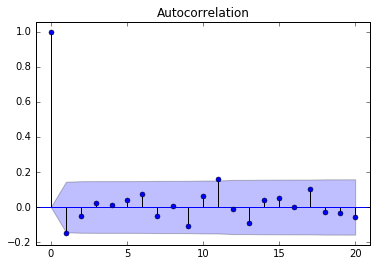

In [321]:
import statsmodels.graphics.tsaplots as tsplots
tsplots.plot_acf(returns, lags= 20)
plt.show()

In [322]:
returns[1:10]

2     0.024891
3     0.003398
4     0.022364
5    -0.018977
6     0.032887
7     0.060988
8    -0.041549
9    -0.023811
10    0.018449
Name: GOLD.RET, dtype: float64

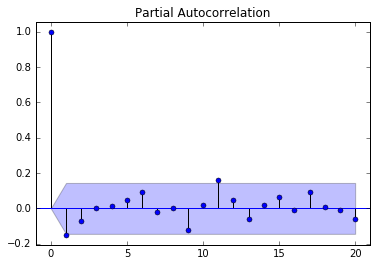

In [327]:
tsplots.plot_pacf(returns, lags= 20)
plt.show()

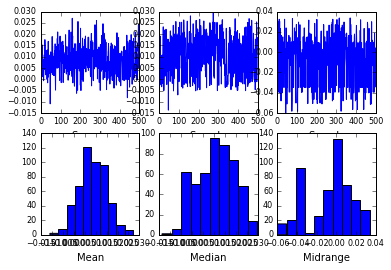

In [328]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(returns, size = 50)
plt.show()


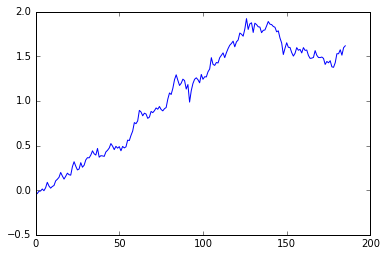

In [447]:
cum = np.cumsum(returns)
plt.plot(cum)

Find out the following facts about the data set
- Total number of data points
- Number of positive returns
- Number of negative returns
- Average annualized returns
- Standard deviation
- Sharpe ratio
- Cumulative returns

In [331]:
total_data = len(returns)
positive_returns = sum(x > 0 for x in returns)
negative_returns = sum(x < 0 for x in returns)
annualized_returns = np.mean(returns)*12
std = np.std(returns)*np.sqrt(12)
Sharpe = annualized_returns/std
Cumulative_returns = (yahoo_close[len(yahoo_close)-1]/yahoo_close[0])-1

print "total_data: {}".format(total_data)
print "positive returns: {}".format(positive_returns)
print "negative returns: {}".format(negative_returns)
print "annualized returns: {}".format(annualized_returns)
print "standard deviation: {}".format(std)
print "Sharpe ratio: {}".format(Sharpe)
print "Cumulative returnsL {}".format(Cumulative_returns)

total_data: 185
positive returns: 103
negative returns: 82
annualized returns: 0.104878600408
standard deviation: 0.178380699602
Sharpe ratio: 0.587948139243
Cumulative returnsL 4.03734129948


## Preparing the data

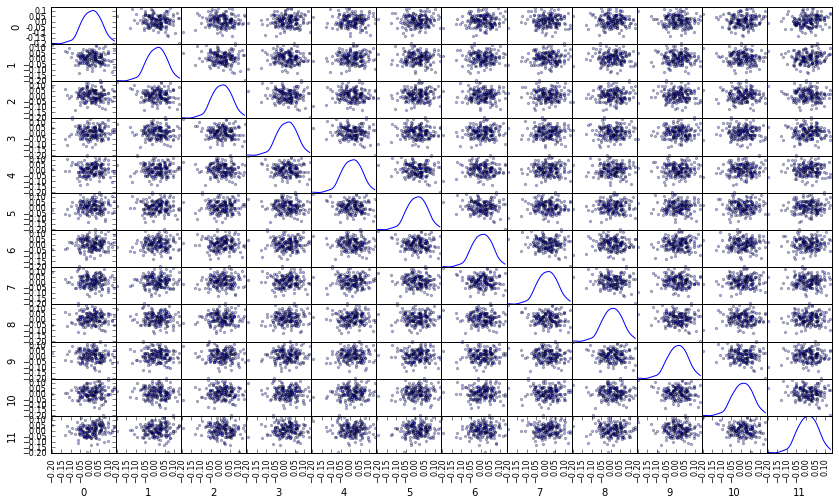

In [450]:
features = df_X[0:-1]

features
pd.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [440]:
num_train = 0.75 * len(returns)
num_test = len(returns) - num_train
num_all = len(returns)
from sklearn.cross_validation import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(returns[1:-1], returns[2:len(returns)], test_size = float(num_test)/num_all, random_state = 42 )

X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size = float(num_test)/num_all, random_state = 42 )


### 1. Use supervised learning algorithms to predict stock returns. Use lagged returns as features. 

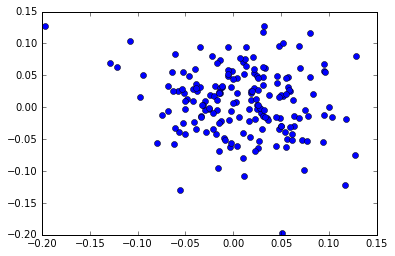

In [333]:
#y = returns[1:len(returns)]
#features = returns[0:len(returns)-1]
#plt.plot(features, y, 'o')

In [369]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
169,-0.000592,0.005903,-0.014908,-0.067878,0.033323,-0.014683,0.022953,-0.068530,-0.005268,0.051652,0.100476,-0.000162
150,-0.050924,-0.002113,-0.056807,-0.039387,0.030956,0.063651,-0.029330,0.009693,-0.039588,0.059528,-0.031271,0.004050
164,0.003068,0.007545,0.076705,-0.052508,-0.025041,-0.000592,0.005903,-0.014908,-0.067878,0.033323,-0.014683,0.022953
85,-0.057390,0.025338,0.045172,-0.015634,-0.094851,0.050439,-0.196561,0.127911,0.080137,0.047481,0.016259,-0.021340
26,0.071347,-0.051221,0.021991,0.059760,0.025225,-0.002078,0.031229,0.047493,-0.033976,-0.013517,0.074054,-0.097770
157,0.009693,-0.039588,0.059528,-0.031271,0.004050,-0.060892,-0.032663,0.003068,0.007545,0.076705,-0.052508,-0.025041
166,0.076705,-0.052508,-0.025041,-0.000592,0.005903,-0.014908,-0.067878,0.033323,-0.014683,0.022953,-0.068530,-0.005268
101,-0.001574,0.056948,0.031637,0.126841,-0.074597,-0.012115,0.032611,-0.005017,0.058779,0.026329,0.027421,-0.052904
68,0.063992,-0.013853,0.021706,0.030958,-0.014227,0.030452,-0.033473,-0.015398,0.024284,0.013257,0.094530,0.068293
36,0.074054,-0.097770,0.016635,-0.002541,-0.005102,0.049642,0.018805,0.025234,0.049743,-0.029001,-0.038600,0.036774


## Try different regression model

In [444]:
from sklearn.svm import SVC
#clf = SVC()
#from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
#clf = LinearRegression()# MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) #SVC()
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

clf1 = LinearRegression()
clf2 = tree.DecisionTreeRegressor()
clf3 = AdaBoostRegressor() #GradientBoostingClassifier()
# Fit model to training data
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

    
train_classifier(clf1, X_train, y_train)
train_classifier(clf2, X_train, y_train)
train_classifier(clf3, X_train, y_train)

from sklearn.metrics import mean_squared_error
y_test_pred1 = predict_returns(clf1, X_test)
y_test_pred2 = predict_returns(clf2, X_test)
y_test_pred3 = predict_returns(clf3, X_test)

mse1 = mean_squared_error(y_test_pred1, y_test)
mse2 = mean_squared_error(y_test_pred2, y_test)
mse3 = mean_squared_error(y_test_pred3, y_test)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)

rmse1, rmse2, rmse3

#print len(y_test_pred)
#print len(y_test)
#sign_pred = [1 if i > 0 else 0 for i in y_test_pred]
#sign_true = [1 if i > 0 else 0 for i in y_test]
#print sign_pred
#print sign_true

#sign_count = [x*y for x,y in zip(sign_pred, sign_true)]
#print sign_count

Training LinearRegression...
Done!
Training time (secs): 0.002
Training DecisionTreeRegressor...
Done!
Training time (secs): 0.002
Training AdaBoostRegressor...
Done!
Training time (secs): 0.147


(0.058277330026768125, 0.080452678200565689, 0.058242890324609303)

In [370]:
threshold = 0
# Train a supervised model and use the model to predict future stock returns
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

from sklearn.svm import SVC
#clf = SVC()
#from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
#clf = LinearRegression()# MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) #SVC()
from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()
clf = LinearRegression()
from sklearn.linear_model import LogisticRegression
# Fit model to training data

train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf  # you can inspect the learned model by printing it

def predict_returns(clf, X_test):
    return clf.predict(X_test)


Training LinearRegression...
Done!
Training time (secs): 0.002
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


0.060563142229
0.694941270691


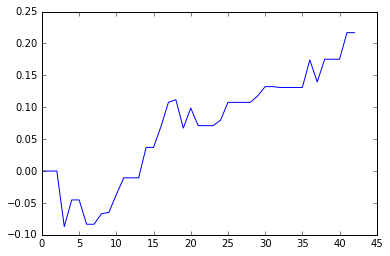

In [449]:

def sup_trading_strat(predict_returns, y_test, X_test):
    total_returns = []
    for i in range(1, len(predict_returns)):
        vol = volatility_estimate(X_test.loc[i, :])

        if predict_returns[i-1] >= threshold:
            total_returns.append(y_test[i] * 0.4 / vol)
            #total_returns.append(y_test[i])
        elif predict_returns[i-1] < -threshold:
            #total_returns.append(-y_test[i] * 0.4 / vol)
            total_returns.append(0)
            
    avg_ret = np.mean(total_returns) * 12
    avg_std = np.std(total_returns) * np.sqrt(12)
    sharpe = avg_ret/avg_std
    cum = np.cumsum(total_returns)
    return avg_ret, sharpe, cum, total_returns

y_test_copy = y_test.reset_index(drop=True)
X_test_copy = features.reset_index(drop=True)
avg_ret, sharpe, cum, total_returns = sup_trading_strat(y_test_pred3, y_test_copy, X_test_copy)
print avg_ret
print sharpe
plt.plot(cum)
#print y_test_pred
#print ""
#print y_test_copy
# calc avg returns, sharpe, cumulative

0.05343328543
0.615587468152
[-0.03440616  0.013436   -0.05724295  0.02000288  0.01260835 -0.02306763
  0.00866497 -0.00787695  0.01201024  0.01736333  0.02684614 -0.02857026
  0.00174299 -0.0061684  -0.00468635 -0.00787108 -0.01052372 -0.00767462
  0.0117335  -0.00137789  0.00625833  0.00063297 -0.03642574  0.00784655
  0.02313236 -0.02195023  0.00066386  0.0123544   0.01314008  0.00222368
 -0.01058235 -0.03096597  0.04035403 -0.00460256  0.05231299  0.00106635
  0.00730758  0.01621597  0.02734031 -0.00837027 -0.00586243 -0.00906835
  0.00111358  0.03040144]

0    -0.014683
1     0.075027
2     0.056948
3    -0.014227
4    -0.121260
5     0.061610
6     0.012023
7    -0.051221
8     0.116397
9     0.020360
10    0.003919
11    0.047481
12    0.050439
13   -0.046465
14    0.025234
15    0.094506
16   -0.021786
17    0.063992
18    0.074054
19    0.007545
20   -0.074597
21    0.047962
22   -0.039588
23    0.049642
24    0.013606
25    0.013257
26    0.063651
27   -0.002078
28    0.02199

### 2. Use unsupervised learning algorithms to predict the sign of stock returns. Use lagged returns as features

In [467]:

X = features
#Y_label = [1 if i >0 else -1 for i in Y]
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(features, Y, test_size = float(num_test)/num_all, random_state = 42 )
y_train_label = [1 if i >0 else -1 for i in y_train_un]
y_test_label = [1 if i >0 else -1 for i in y_test_un]

In [469]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
clf11 = KNeighborsClassifier()
clf22 = GaussianNB()
clf33 = AdaBoostClassifier()

train_classifier(clf11, X_train_un, y_train_label)
train_classifier(clf22, X_train_un, y_train_label)
train_classifier(clf33, X_train_un, y_train_label)

def predict_return_sign(clf, X_test_un):
    return clf.predict(X_test_un)

pred_label1_t = predict_return_sign(clf11, X_train_un)
pred_label2_t = predict_return_sign(clf22, X_train_un)
pred_label3_t = predict_return_sign(clf33, X_train_un)

pred_label1 = predict_return_sign(clf11, X_test_un)
pred_label2 = predict_return_sign(clf22, X_test_un)
pred_label3 = predict_return_sign(clf33, X_test_un)

score1 = f1_score(pred_label1_t, y_train_label)
score2 = f1_score(pred_label2_t, y_train_label)
score3 = f1_score(pred_label3_t, y_train_label)
print score1
print score2
print score3

score11 = f1_score(pred_label1, y_test_label)
score22 = f1_score(pred_label2, y_test_label)
score33 = f1_score(pred_label3, y_test_label)
print score11
print score22
print score33

Training KNeighborsClassifier...
Done!
Training time (secs): 0.002
Training GaussianNB...
Done!
Training time (secs): 0.002
Training AdaBoostClassifier...
Done!
Training time (secs): 0.153
0.677165354331
0.603174603175
0.96875
0.509803921569
0.627450980392
0.576923076923


In [471]:
def unsup_trading_strat(predict_returns, y_test, X_test):
    total_returns = []
    vols = []
    for i in range(1, len(predict_returns)):
        vol = volatility_estimate(X_test.loc[i, :])
        vols.append(vol)
        if predict_returns[i-1] > 0:
            total_returns.append(y_test[i] * 0.4 / vol)
        else:
            #total_returns.append(-y_test[i] * 0.4 / vol)
            total_returns.append(0)
    avg_ret = np.mean(total_returns) * 12
    avg_std = np.std(total_returns) * np.sqrt(12)
    sharpe = avg_ret/avg_std
    cum = np.cumsum(total_returns)
    return avg_ret, sharpe, cum, total_returns, vols


0.0769242132386
1.07481091513
[0, 0, 0, 0, 0.024257436978438261, 0, -0.025848294272450195, 0, 0.012012049660390484, 0.0015506876947263433, 0.011640501689905387, 0, -0.037980780703698785, 0, 0.076186619006341383, -0.012864563806531167, 0.0322385330791932, 0.053003074138414756, 0, -0.033507647777044826, 0, 0, 0, 0, 0.011745278849500324, 0, -0.0011459043220776715, 0, -0.016605488523952709, 0.010144644610994666, 0.012903966036815383, 0, -0.00081698215386755884, 0.020209525701146605, 0, 0.032140620895017923, 0.033726034602893785, 0, 0.024167738060815631, 0, 0, 0.048488047993291206, 0]


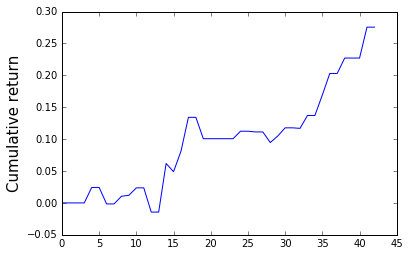

In [477]:

y_test_un_copy = y_test_un.reset_index(drop=True)
X_test_un_copy = X_test_un.reset_index(drop=True)
un_ret, un_sharpe, un_cum, new_returns, vols = unsup_trading_strat(pred_label3, y_test_un_copy, X_test_un_copy)
print un_ret
print un_sharpe
print new_returns
plt.plot(un_cum)
plt.ylabel("Cumulative return", fontsize = 15)

In [384]:
un_sharpe

-0.34439460364407498

In [473]:
print volatility_estimate(y_test[0:10])
print "Average return: {}".format(un_ret)
print "Sharpe: {}".format(un_sharpe)
plt.plot(un_cum)

KeyError: 0

In [276]:
vols

[0.4,
 0.0024298931456543335,
 0.00338466292495921,
 0.0056002755962926984,
 0.0060478713120559651,
 0.0055576102069935561,
 0.0075741978859318031,
 0.0071705287345763744,
 0.013252718961749062,
 0.013089128019074015,
 0.012565397740770963,
 0.012691600149073796,
 0.01235222645181615,
 0.012747529475095751,
 0.012518328913724132,
 0.013462640522960589,
 0.013531197117887877,
 0.013482165942284501,
 0.01324528393262382,
 0.013062338297376097,
 0.012858344836103441,
 0.013261539430523429,
 0.013088580950786065,
 0.013250786294016156,
 0.013055213163783387,
 0.01286903855131067,
 0.014317834163618044,
 0.014261709991847933,
 0.014407424307681681,
 0.014413273797968121,
 0.014233333630317507,
 0.014027846427633921,
 0.013871220212357666,
 0.013721654851375067,
 0.013720027136057283,
 0.013530400069141002,
 0.013411439399936222,
 0.012689041804321354,
 0.012794074679931313,
 0.012686391251360072,
 0.012857771481194056,
 0.012727282536760079,
 0.012611878503498836,
 0.012515157943988404,
 0.

## Volatility model. 
### Use volatility to determine the size of this instrument to maximize the return per risk. 

In [411]:
def volatility_estimate(r_t):
    var = 0
    r_m = np.mean(r_t)
    
    total_num = len(r_t)
    total_sum = total_num*(total_num+1)/float(2) 
    delta = 0.7
    if total_num == 1:
        return 0.4
    
    for i in range(0, total_num):
        delta_i = (i+1)/float(total_sum) #(1-delta)* delta_i * 
        var = var + (delta_i) * (r_t[i] - r_m)**2

    return np.sqrt(var * 261)


In [420]:
X_test_copy

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.060892,-0.032663,0.003068,0.007545,0.076705,-0.052508,-0.025041,-0.000592,0.005903,-0.014908,-0.067878,0.033323
1,0.018805,0.025234,0.049743,-0.029001,-0.038600,0.036774,-0.020548,0.017114,-0.046465,0.048756,-0.016609,0.012023
2,0.050439,-0.196561,0.127911,0.080137,0.047481,0.016259,-0.021340,-0.034627,0.093758,-0.053942,0.027964,-0.001574
3,0.031250,0.117745,-0.018505,-0.042120,0.029117,-0.009506,-0.048265,0.013606,0.063992,-0.013853,0.021706,0.030958
4,0.046003,0.037372,0.019982,0.025942,-0.063610,0.055487,0.020360,0.078497,-0.013259,-0.021786,0.080206,0.116397
5,0.045399,0.049657,-0.029800,-0.004781,-0.020729,-0.009112,-0.050957,0.010527,-0.080058,-0.055517,-0.129293,0.069978
6,0.049642,0.018805,0.025234,0.049743,-0.029001,-0.038600,0.036774,-0.020548,0.017114,-0.046465,0.048756,-0.016609
7,-0.039355,-0.034682,0.031171,0.034871,-0.017126,-0.005038,0.094506,0.056121,-0.050108,-0.041976,0.010366,0.071347
8,0.055389,0.046003,0.037372,0.019982,0.025942,-0.063610,0.055487,0.020360,0.078497,-0.013259,-0.021786,0.080206
9,-0.005017,0.058779,0.026329,0.027421,-0.052904,0.055389,0.046003,0.037372,0.019982,0.025942,-0.063610,0.055487


In [427]:

X_test_copy = X_test.reset_index(drop=True)
X_test_copy.loc[1, :]
volatility_estimate(X_test_copy.loc[1, :])

0.52238614133963657

In [278]:
volatility_estimate(y_test)

0.018453591409774896

In [279]:
np.std(y_test)*np.sqrt(261)

0.017324049773300237